In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---

# The Problem

We start by exploring a simple puzzle. How many countable squares in a $l \times l$ grid?  
It is fairly easy to simply count every square you see, but these situations can become more complex. See for example

![Original Problem](https://static.wixstatic.com/media/0b125c_7ccf881d48c04fb78b51db04df99aa67~mv2.jpg/v1/fill/w_360,h_477,al_c,q_90,usm_0.66_1.00_0.01/0b125c_7ccf881d48c04fb78b51db04df99aa67~mv2.webp)

It can be shown that **the number of countable squares in a grid divided into $l \times l$ seqments is given by**

\begin{equation}
    n = \sum^l_{s=1} s^2 = 1^2 + 2^2 + \ldots + l^2
\end{equation}

For example, a square divided into 9 (that is, $l=3$) has 14 countable squares: the 9 inner $1\times1$ squares the 4 larger $2\times 2$ and the one largest outer square. See below.

![Example](https://qph.fs.quoracdn.net/main-qimg-fa0653f6352342edbdb178d5893fd08f.webp)

So instead, we will go through and see how we can use statistical learning methods to estimate or perhaps even result in the same description of growth as in Equation 1.

---

## Set up data
We will jump ahead to writing a function that will create a dataframe that contains the information for $l$ as well as the true answers, $n$, given by Equation 1. We do this for values $l: 1 \to 100$ and store this in a variable $n$.  
Additionally, we will be making some extra columns to be able to fit a non-linear model. This will be discussed later.

In [2]:
l =  np.arange(1,101,1)

In [3]:
n = []

In [4]:
def l_squared_sum(array):
    value = 0
    for el in array:
        value+= el**2
        n.append(value)

In [5]:
l_squared_sum(l)
np.array(n)

array([     1,      5,     14,     30,     55,     91,    140,    204,
          285,    385,    506,    650,    819,   1015,   1240,   1496,
         1785,   2109,   2470,   2870,   3311,   3795,   4324,   4900,
         5525,   6201,   6930,   7714,   8555,   9455,  10416,  11440,
        12529,  13685,  14910,  16206,  17575,  19019,  20540,  22140,
        23821,  25585,  27434,  29370,  31395,  33511,  35720,  38024,
        40425,  42925,  45526,  48230,  51039,  53955,  56980,  60116,
        63365,  66729,  70210,  73810,  77531,  81375,  85344,  89440,
        93665,  98021, 102510, 107134, 111895, 116795, 121836, 127020,
       132349, 137825, 143450, 149226, 155155, 161239, 167480, 173880,
       180441, 187165, 194054, 201110, 208335, 215731, 223300, 231044,
       238965, 247065, 255346, 263810, 272459, 281295, 290320, 299536,
       308945, 318549, 328350, 338350])

In [6]:
df = pd.DataFrame()

In [7]:
df['l'] = l
df['l2'] = l**2
df['l3'] = l**3
df['n'] = n

In [8]:
df.head()

,l,l2,l3,n
0,1,1,1,1
1,2,4,8,5
2,3,9,27,14
3,4,16,64,30
4,5,25,125,55


---

## Visualization
Just by glancing at the dataframe, you can see there is a nonlinear relationship between $l$ and $n$, as $n$ increases faster than $l^2$ but slower than $l^3$. The true growth of $n$ must be somewhere in between.

Let's first see the data $l \text{ vs  } n$.

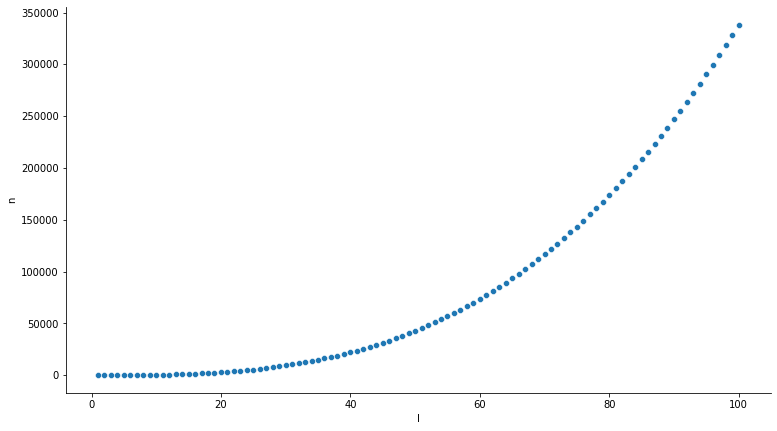

In [9]:
g = sns.relplot(x=df['l'], y=df['n'], kind='scatter')
g.fig.set_figwidth(12)
g.fig.set_figheight(6)
plt.show()

---

## Draw the models
We could see from the data that choosing a model with degree higher than 3 shouldn't be necessary.  
Let's visualize that intuition to see if such a model will be accurate, or if a lower degree model will suffice.

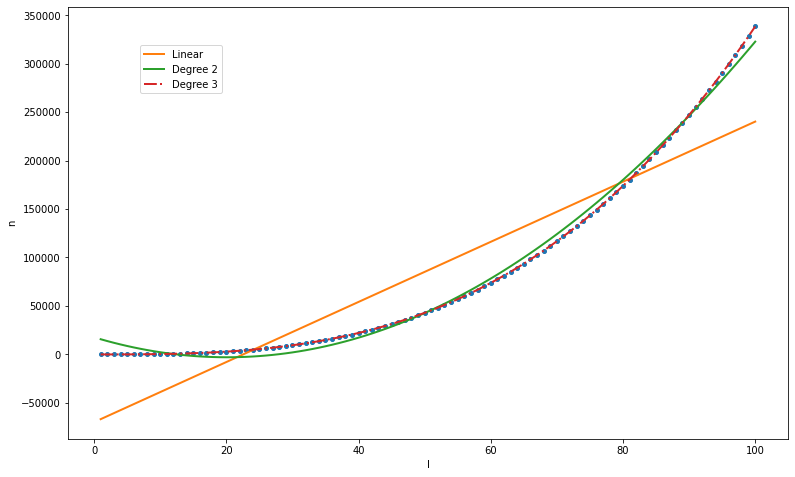

In [10]:
#Quick fit and visualization
xp = np.linspace(1, 100, 100)

z = np.polyfit(l, n, 1)
z2 = np.polyfit(l, n, 2)
z3 = np.polyfit(l, n, 3)

p = np.poly1d(z)
p2 = np.poly1d(z2)
p3 = np.poly1d(z3)

fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.set_xlabel('l')
ax.set_ylabel('n')

ax.plot(l, n, '.', markersize=8)
ax.plot(xp, p(xp), label='Linear', lw=2)
ax.plot(xp, p2(xp), label='Degree 2', lw=2)
ax.plot(xp, p3(xp), '-.', label='Degree 3', lw=2)

ax.legend(loc=(0.1,0.8))
plt.show()

The figure suggests our intuition is correct. Moreover, degree 3 seems better than degree 2, and we can also see how a linear model would not work well at all. In fact, due to the lack of any noise in this data, degree 3 fits the data so closely, it is difficult to show both the data and the regression line for degree 3.

So we will use the following (degree = 3) model:

\begin{equation}
    n \approx \beta_0 + \beta_1 l + \beta_2 l^2 + \beta_3 l^3
\end{equation}

It's worth noting at this point that this model will not be *correct* in the mathematical sense. That is, Equation 2 is not the same description of growth as Equation 1, regardless of the values you fill in for the $\beta$ coefficients. I will briefly attempt to explain the concept of bias-variance tradeoff at work as it pertains to this type of solution, and how the resulting model can still be expected to perform.

We are, for the sake of learning, pretending to not know the actual growth of $n$ as a function of $l$. Equation 1 is a fairly complex mathematical description of the growth when you compare it to what we using as a model, but it is the **truth**. We are reducing the complexity of such a system by attempting to fit the data into some sort of linear model. Of course, an actual linear model is *too* simple (we say our model has too much bias), and so we can attempt to add more flexibility to our model by increasing the variance of our model. That's what the higher order terms are doing in the linear model.

As we move on, we can expect decent performance from a model with sufficient variance to make up for the high bias introduced by substituting the *actual equation of growth* for a simplified one; **but as close as it gets to being right, it won't ever be true**. The model will not give us any deeper understanding beyond making predictions.

---

## Find Coefficients
Okay, let's fit this model (Equation 2) then.

In [11]:
X = df[['l','l2','l3']]

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()

In [14]:
lm.fit(X, n)

LinearRegression()

In [15]:
print('Intercept: ', lm.intercept_)

Intercept:  -1.4551915228366852e-11


In [16]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff (𝛽)'])
cdf

,Coeff (𝛽)
l,0.166667
l2,0.500000
l3,0.333333


This tells us our fitted model is

\begin{equation}
    n \approx -0.0000000000146 + \frac{1}{6} l + \frac{1}{2} l^2 + \frac{1}{3} l^3 
\end{equation}

---

## Make a few predictions

Now to test our model against a few data points outside of what we use to train the model ($l_{\text{train}}: 1 \to 100$)

In [17]:
l_test = [[110, 110**2, 110**3],
          [222, 222**2, 222**3],
          [315,315**2,315**3],
          [346,346**2,346**3],
         [869,869**2,869**3]]
l_test

[[110, 12100, 1331000],
 [222, 49284, 10941048],
 [315, 99225, 31255875],
 [346, 119716, 41421736],
 [869, 755161, 656234909]]

In [18]:
predictions = lm.predict(l_test)

In [19]:
print('Predictions:', predictions)

Predictions: [4.49735000e+05 3.67169500e+06 1.04682900e+07 1.38671610e+07
 2.19122695e+08]


In [20]:
n_test = [449735,3671695,10468290,13867161,219122695]

Compare the values of `n_test` to the `predictions` array above.

---

## Review
Let's see how accurate the predictions were.

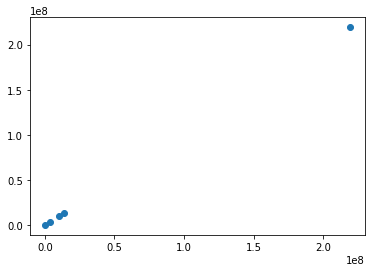

In [21]:
plt.scatter(n_test,predictions)
plt.show()

In [22]:
from sklearn import metrics

In [23]:
metrics.mean_absolute_error(n_test,predictions)

4.773028194904327e-10

---

## Final Thoughts
So we have a resulting model that is incredibly accurate at making preditions. The average error is approximately 0 (0.000000000477) and if you round each prediction to the nearest integer, it is 100% accurate on every test prediction.

But, it is important to remember, this is not the same as Equation 1.